# Exploratory Data Analysis

Pandas module is imported to create dataframes from csv file and manipulate the created dataframes to carry out analytical tasks.
Pyplot submodule of Matplotlib library is used here to create simple plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Here using _read_csv_ function of Pandas library, the dataset in csv format is converted to a pandas dataframe saved in variable `grd`.

In [2]:
grd = pd.read_csv('../data/graphene_data_final.csv')

A glimple of the imported dataset is shown below.

In [3]:
grd

,Graphene_percentage,FEED,RPM,DOC,MRR_gm_per_sec,Ra
0,0.00,100,1000,0.10,0.012697,0.418
1,0.00,100,1000,0.15,0.020327,0.959
2,0.00,100,1000,0.20,0.031002,0.331
3,0.00,100,2000,0.10,0.012720,0.378
4,0.00,100,2000,0.15,0.019914,0.441
...,...,...,...,...,...,...
130,0.03,200,2000,0.15,0.041111,0.708
131,0.03,200,2000,0.20,0.050602,0.586
132,0.03,200,3000,0.10,0.021910,0.906
133,0.03,200,3000,0.15,0.038930,0.927


The table below shows the variable names of the datset and their corresponding full/actual names.

  Variable name in dataset   | Full name of the variable
  ---------|----------------
  Graphene_percentage | Percentage of Graphene     
  FEED | Feed value of the machine
  RPM | Rotations per Minute
  DOC | Depth of Curve
  MRR_gm_per_sec | Material Removal Rate(in gram/second)
  Ra | Surface Roughness

Following cell shows the correlation coefficients among all the variables in the dataset.

In [4]:
grd.corr()

,Graphene_percentage,FEED,RPM,DOC,MRR_gm_per_sec,Ra
Graphene_percentage,1.000000e+00,-7.818067e-16,-2.453900e-16,1.698659e-16,-0.040645,0.082983
FEED,-7.818067e-16,1.000000e+00,-4.203887e-17,-5.329071e-17,0.590197,0.191750
RPM,-2.453900e-16,-4.203887e-17,1.000000e+00,-2.052679e-17,0.022629,-0.305373
DOC,1.698659e-16,-5.329071e-17,-2.052679e-17,1.000000e+00,0.716658,-0.034006
MRR_gm_per_sec,-4.064458e-02,5.901971e-01,2.262917e-02,7.166582e-01,1.000000,0.124521
Ra,8.298294e-02,1.917504e-01,-3.053734e-01,-3.400605e-02,0.124521,1.000000


The cell given below only shows the correlation coefficients which are larger than 0.1 and makes the rest of the coefficients 0.
This table is shown to view only the statistically signifiacant correlations.

In [5]:
grd.corr()*(grd.corr()>=0.1).astype('float')

,Graphene_percentage,FEED,RPM,DOC,MRR_gm_per_sec,Ra
Graphene_percentage,1.0,-0.000000,-0.0,0.000000,-0.000000,0.000000
FEED,-0.0,1.000000,-0.0,-0.000000,0.590197,0.191750
RPM,-0.0,-0.000000,1.0,-0.000000,0.000000,-0.000000
DOC,0.0,-0.000000,-0.0,1.000000,0.716658,-0.000000
MRR_gm_per_sec,-0.0,0.590197,0.0,0.716658,1.000000,0.124521
Ra,0.0,0.191750,-0.0,-0.000000,0.124521,1.000000


It can be seen that `DOC` and `MRR_gm_per_sec` pair has the highest correlation followed by `FEED` and `MRR_gm_per_sec` pair and `FEED` and `Ra` pair.

It also shows that **graphene percentage** has no linear relation with either **material removal rate**
or **surface roughness**.

In [6]:
grd.columns[:4]

Index(['Graphene_percentage', 'FEED', 'RPM', 'DOC'], dtype='object')

Using the above 4 variables **Material removal rate** and **Surface roughness** will be predicted by machine learning models in the next notebooks.

Below the scatter plot between **Material removal rate** and first 4 variables are plotted.

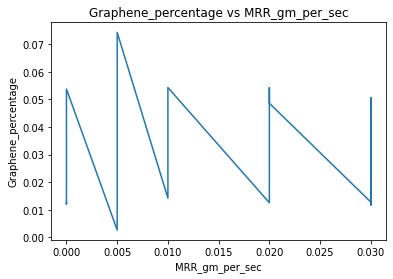

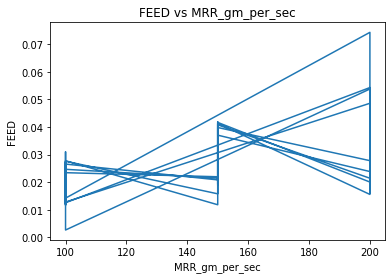

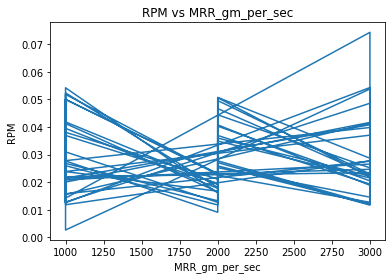

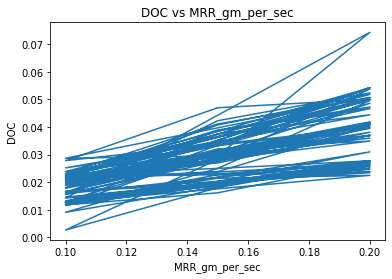

In [10]:
num_ = 1
for i in grd.columns[:4]:
    plt.figure(num = num_)
    num_ += 1
    plt.plot(grd[i],grd['MRR_gm_per_sec'])
    plt.ylabel(i)
    plt.xlabel('MRR_gm_per_sec')
    plt.title(i+' vs MRR_gm_per_sec')

It can be seen that **depth of curvature** and **FEED** have very significant positive relation with **MRR**.
`RPM` and `graphene_percentage` don't seem to have any relation with the **Material removal rate**.

Below the scatter plot between **Surface roughness** and first 4 variables are plotted.

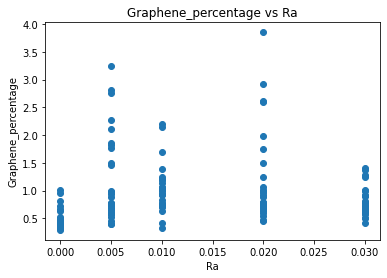

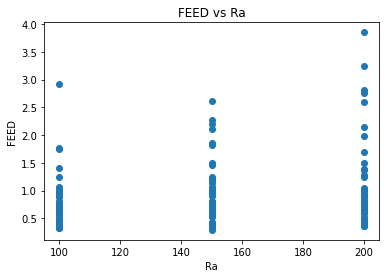

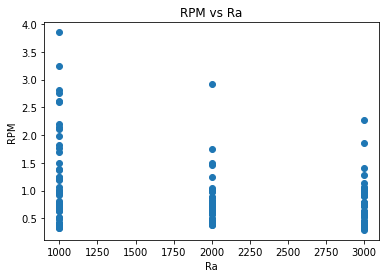

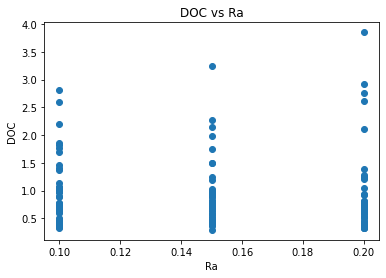

In [8]:
num_ = 1
for i in grd.columns[:4]:
    plt.figure(num = num_)
    num_ += 1
    plt.scatter(grd[i],grd['Ra'])
    plt.ylabel(i)
    plt.xlabel('Ra')
    plt.title(i+' vs Ra')

It is visible that `RPM` and `Ra` have somewhat negative relation. `Graphene_percentage` and `DOC` don't seem to have any clear relation with **surface roughness**. `FEED` can be seen being strongly related to **surface roughness**.